In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
print(x_train[27])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   9  80 207 255 254 254 254  97
   80  80  44   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  39 158 158 158 168 253 253 253 253 253 253 253
  253 253 210  38   0   0   0   0   0   0]
 [  0   0   0   0   0   0 226 253 253 253 253 253 253 253 253 253 253 253
  253 253 253 241 146   0   0   0   0   0]
 [  0   0   0   0   0   0 139 253 253 253 238 113 215 253 253 25

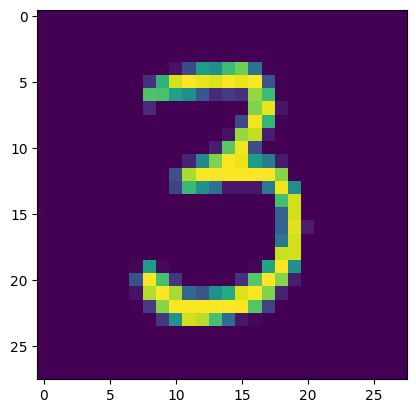

3


In [ ]:
plt.imshow(x_train[50])
plt.show()
print(y_train[50])


In [ ]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
model = keras.Sequential(
                          [
                           keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(55, activation='relu'),
                           keras.layers.Dense(55, activation='relu'),
                           keras.layers.Dense(10, activation='sigmoid')
                          ]
)

In [ ]:
model.compile(
              optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

In [ ]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8601 - loss: 0.4905
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9567 - loss: 0.1445
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9685 - loss: 0.1012
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9772 - loss: 0.0765
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9813 - loss: 0.0614
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9853 - loss: 0.0498
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9882 - loss: 0.0405
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9897 - loss: 0.0358
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9908 - loss: 0.0307
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9907 - loss: 0.0283
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9920 - loss: 0.0234
Epoch 12/15
1875/1875 ━━━━━━━━

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9692 - loss: 0.1448
0.972100019454956


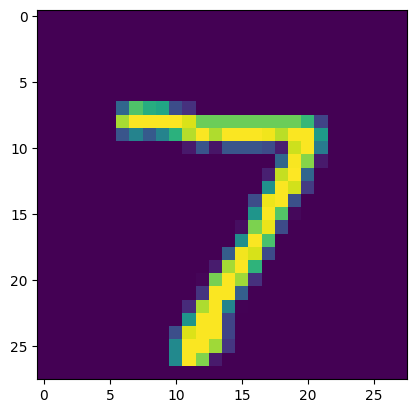

In [ ]:
plt.imshow(x_test[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(y_pred[0])

[1.3984945e-03 4.0214316e-05 1.9616084e-02 8.1835330e-01 4.9768499e-08
 4.6589525e-06 2.2949879e-13 9.9999154e-01 4.2385022e-05 9.9885988e-01]


In [ ]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(5), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 967    0    0    0    1    0    4    0    4    4]
 [   1 1122    1    1    1    1    3    1    3    1]
 [   5    2 1000    5    3    0    1    6    9    1]
 [   1    0    3  988    0    4    1    4    3    6]
 [   0    0    6    0  962    0    1    2    1   10]
 [   1    2    0   21    1  857    6    0    2    2]
 [   8    2    2    1    4    5  935    0    1    0]
 [   2    4    9    1    3    0    0  977    3   29]
 [   1    0    5    3    7    5    4    3  941    5]
 [   2    3    0    3   19    8    0    1    1  972]], shape=(10, 10), dtype=int32)


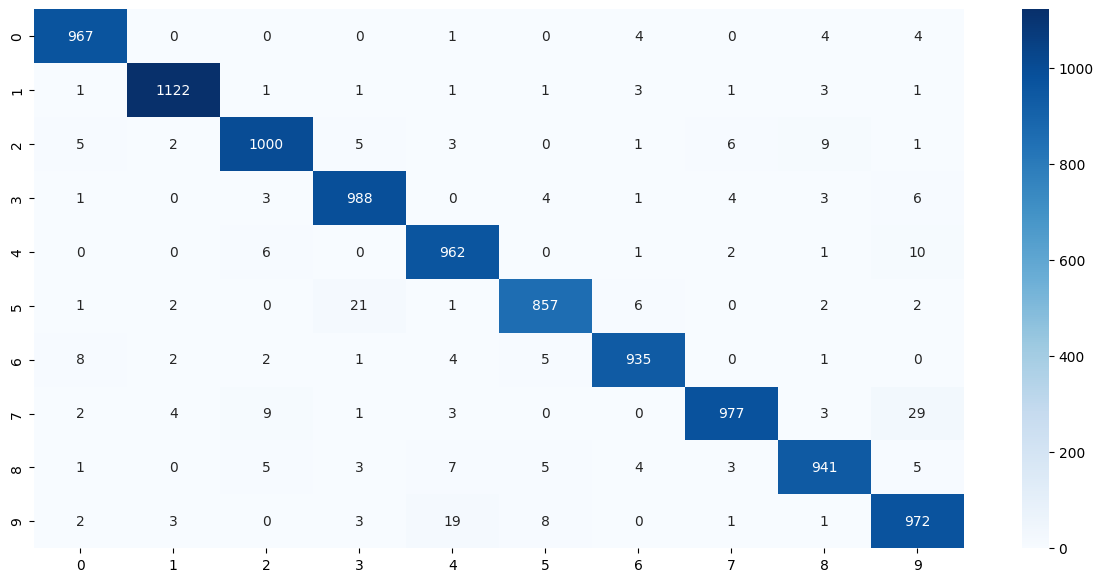

In [ ]:
plt.figure(figsize=(15,7))
plt.ylabel=('True labels')
plt.xlabel=('Predicted labels')
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.ylabel=('True labels')
plt.xlabel=('Predicted labels')

In [ ]:
input_image_path = "/content/1002.png"
input_image = cv2.imread(input_image_path)
type(input_image)

numpy.ndarray

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(28, 28, 3)

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale.shape

(28, 28)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
type(input_image_resize)

numpy.ndarray

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
[[2.6418744e-05 2.9220656e-01 1.0000000e+00 9.5362699e-01 7.5045054e-10
  3.6072154e-06 1.3715822e-06 5.9130849e-05 9.9697149e-01 1.6289680e-09]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

Path of the image to be predicted: /content/28a4fd850c0b4e345a3cf1a67e1cc0ca.jpg


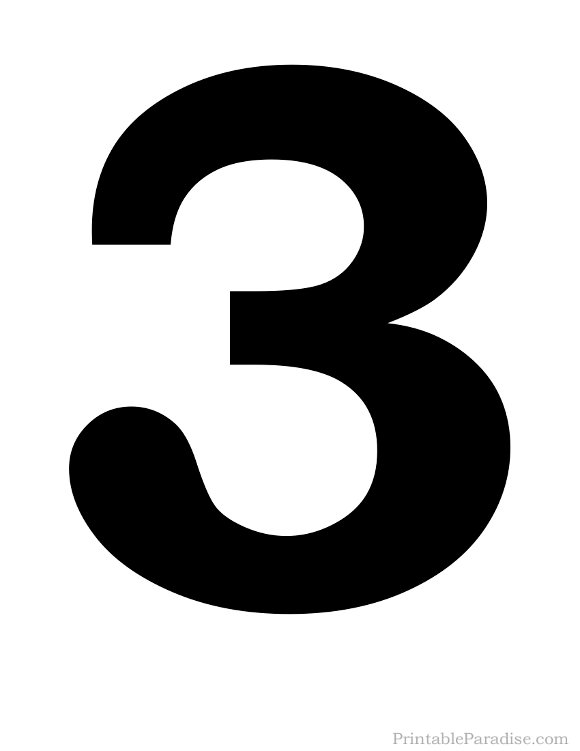

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The Handwritten Digit is recognised as  3


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)